## Τελική εργασία - Παπαχρήστου Σοφία
(Μέρος scraping ειδησεογραφικής πηγής)
https://www.news247.gr/eksafanish

In [1]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import numpy as np
import requests
import time

In [2]:
req = Request('https://www.news247.gr/eksafanish', headers={'User-Agent': 'Mozilla/5.0'})
webpage = urlopen(req).read()
news247 = BeautifulSoup(webpage, "html.parser")

In [3]:
data_list = []
url_list = []

base_url = "https://www.news247.gr/eksafanish?pages="

for i in range(1,10): #δεν εχει παραπάνω σελιδες μόνο τόσες
    url = base_url + str(i)
    #print(url)
    page = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'})
    s = BeautifulSoup(page.content, 'html.parser')

    articles = s.find_all('article', attrs={'class':'article_left'}, recursive=True)

    for article in articles:
      url = article.find('a')
      title = article.find('a')
      date = article.find('time')
      tag = article.find('div', attrs={'class':'article__summary'})
    
      data = {
          'Title': title['title'],
          'Datetime': date['datetime'],
          'Tag': tag.a['title'],
          'Summary': article.find('p', attrs={'class':'article__leadtext'}).text,
          'Url': url['href']
      }
      data_list.append(data)
      url_list.append(url['href'])

Θα ανοίξω όλα τα url άρθρων και θα πάρω ολόκληρο το κείμενο για κάθε άρθρο.

In [21]:
full_text_list= []

for i in range(len(url_list)):
  reqs2 = requests.get(url_list[i])
  soup2 = BeautifulSoup(reqs2.content, "html.parser")

  article_text = ''
  texts = soup2.find('div', attrs={'class':'article-body__body'}, recursive=True).findAll('p')
  for item in texts:
    article_text += '\n' + ''.join(item.findAll(text = True))

  full_text_list.append(article_text)

In [25]:
df= pd.DataFrame(data_list)
df

,Title,Datetime,Tag,Summary,Url
0,Συναγερμός για την εξαφάνιση 13χρονης στη Χαλκ...,2022-06-28 22:17,εξαφάνιση,"Η Χαλιμά Α. έχει ύψος 1,60 μ., έχει κανονικό β...",https://www.news247.gr/koinonia/synagermos-gia...
1,Ιωάννινα: Αγνοείται 16χρονος στη λίμνη Πηγών Αώου,2022-06-26 18:40,εξαφάνιση,Σε εξέλιξη επιχείρηση για τον εντοπισμό ανηλίκ...,https://www.news247.gr/koinonia/ioannina-agnoe...
2,Τραγωδία στην Κρήτη: Νεκρός ο Γάλλος τουρίστας...,2022-06-26 13:10,Κρήτη,Τραγική κατάληξη είχε η επιχείρηση εντοπισμού ...,https://www.news247.gr/koinonia/tragodia-stin-...
3,Συναγερμός για την εξαφάνιση 54χρονης στις Σέρρες,2022-06-25 19:18,εξαφάνιση,Η Ελισσάβετ Ακριτίδου εξαφανίστηκε στην περιοχ...,https://www.news247.gr/koinonia/synagermos-gia...
4,Συναγερμός για την εξαφάνιση 11χρονου από την ...,2022-06-25 00:12,εξαφάνιση,Ένα 11χρονο παιδί εξαφανίστηκε την Τρίτη (21/0...,https://www.news247.gr/koinonia/synagermos-gia...
...,...,...,...,...,...
349,Καβάλα: Μυστηριώδης εξαφάνιση 12χρονης κόρης ε...,2018-12-20 12:10,εξαφάνιση,Θρίλερ με την εξαφάνιση της 12χρονης Γεωργίας ...,https://www.news247.gr/koinonia/kavala-mystiri...
350,Εξαφάνιση 17χρονης από την Αλεξάνδρεια Ημαθίας...,2018-06-02 19:13,εξαφάνιση,Συναγερμός έχει σημάνει στις Αρχές για την 17χ...,https://www.news247.gr/koinonia/exafanisi-17ch...
351,Ναύπακτος: Εντοπίστηκε σώος ο 19χρονος που αγν...,2018-05-14 10:49,εξαφάνιση,Ο 19χρονος εντοπίστηκε στη περιοχή της Βαράσοβ...,https://www.news247.gr/koinonia/naypaktos-ento...
352,Θρίλερ με την υπόθεση εξαφάνισης του Θανάση απ...,2018-03-26 12:53,εξαφάνιση,Συνεχίζεται το θρίλερ της υπόθεση του 13χρονου...,https://www.news247.gr/koinonia/thriler-me-tin...


In [26]:
df['Text'] = full_text_list

In [28]:
df.head()

,Title,Datetime,Tag,Summary,Url,Text
0,Συναγερμός για την εξαφάνιση 13χρονης στη Χαλκ...,2022-06-28 22:17,εξαφάνιση,"Η Χαλιμά Α. έχει ύψος 1,60 μ., έχει κανονικό β...",https://www.news247.gr/koinonia/synagermos-gia...,"\nΣτις 27/06/2022, στις 20:30 μμ, εξαφανίστηκε..."
1,Ιωάννινα: Αγνοείται 16χρονος στη λίμνη Πηγών Αώου,2022-06-26 18:40,εξαφάνιση,Σε εξέλιξη επιχείρηση για τον εντοπισμό ανηλίκ...,https://www.news247.gr/koinonia/ioannina-agnoe...,\nΣυναγερμός σήμανε το απόγευμα της Κυριακής (...
2,Τραγωδία στην Κρήτη: Νεκρός ο Γάλλος τουρίστας...,2022-06-26 13:10,Κρήτη,Τραγική κατάληξη είχε η επιχείρηση εντοπισμού ...,https://www.news247.gr/koinonia/tragodia-stin-...,\nΝεκρός βρέθηκε ο 65χρονος άνδρας από τη Γαλλ...
3,Συναγερμός για την εξαφάνιση 54χρονης στις Σέρρες,2022-06-25 19:18,εξαφάνιση,Η Ελισσάβετ Ακριτίδου εξαφανίστηκε στην περιοχ...,https://www.news247.gr/koinonia/synagermos-gia...,\nΣυναγερμός έχει σημάνει στις Αρχές για την ε...
4,Συναγερμός για την εξαφάνιση 11χρονου από την ...,2022-06-25 00:12,εξαφάνιση,Ένα 11χρονο παιδί εξαφανίστηκε την Τρίτη (21/0...,https://www.news247.gr/koinonia/synagermos-gia...,\nΣυναγερμός έχει σημάνει τις τελευταίες ώρες ...


In [29]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [30]:
df.to_csv("/content/gdrive/My Drive/Colab Notebooks/articles_finalproject.csv", sep='t', encoding='utf-8', index=False)

In [31]:
dfinal= pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/articles_finalproject.csv", sep='t')

In [32]:
from datetime import datetime

In [33]:
dfinal['Datetime'] = dfinal['Datetime'].astype('datetime64[ns]')

In [34]:
dfinal['Year'] = pd.DatetimeIndex(dfinal['Datetime']).year
dfinal['Month'] = pd.DatetimeIndex(dfinal['Datetime']).month

In [36]:
#κείμενα σε πεζούς χαρακτήρες (απαλοιφή κεφαλαίων)
dfinal['Text'] = dfinal['Text'].str.lower()

In [68]:
dfinal['Text'] = dfinal['Text'].str.replace('\n', '', regex=True).str.replace('google', '', regex=True).str.replace('ακολουθήστε', '', regex=True).str.replace('news247.gr', '', regex=True).str.replace('news', '', regex=True).str.replace('μάθετε', '', regex=True).str.replace('πρώτοι', '', regex=True)

In [69]:
dfinal.tail(2)

,Title,Datetime,Tag,Summary,Url,Text,Year,Month
352,Θρίλερ με την υπόθεση εξαφάνισης του Θανάση απ...,2018-03-26 12:53:00,εξαφάνιση,Συνεχίζεται το θρίλερ της υπόθεση του 13χρονου...,https://www.news247.gr/koinonia/thriler-me-tin...,τα ίχνη του 13χρονου αγοριού που εξακολουθούν ...,2018,3
353,Συναγερμός για την εξαφάνιση του 13χρονου Θανά...,2018-03-24 21:13:00,εξαφάνιση,Τα ίχνη του ανήλικου αγοριού χάθηκαν στις 16.0...,https://www.news247.gr/koinonia/synagermos-gia...,συναγερμός σήμανε στις αρχές για την εξαφάνιση...,2018,3


**Wordcloud**

In [70]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import spacy

In [71]:
text = dfinal['Text'].str.cat(sep = ' ').replace("amp", ' ')

In [72]:
#!python -m spacy download el_core_news_sm

In [73]:
nlp = spacy.load('el_core_news_sm')

In [74]:
list(nlp.Defaults.stop_words)[0:10]

['μείον',
 'τον',
 'ευτυχώς',
 'δικοί',
 'έκαστοι',
 'πια',
 'καθενός',
 'μια',
 'λοιπόν',
 'όσες']

In [75]:
doc = nlp(dfinal['Text'][1])

In [76]:
for token in doc:
    print(token, token.lemma_)

συναγερμός συναγερμός
σήμανε σήμανε
το ο
απόγευμα απόγευμα
της ο
κυριακής κυριακή
( (
26/06 26/06
) )
στα σε ο
ιωάννινα ιωάννινα
, ,
για για
την ο
εξαφάνιση εξαφάνιση
ανηλίκου ανηλίκου
στη σε ο
λίμνη λίμνη
πηγών πηγών
αώου.σύμφωνα αώου.σύμφωνα
με με
epiruspost epiruspost
, ,
πρόκειται πρόκειται
για για
ένα ένας
παιδί παιδί
ηλικίας ηλικία
16 16
έως ώς
17 17
ετών έτος
το ο
οποίο οποίος
με με
την ο
παρέα παρέα
του μου
βρέθηκε βρέθηκε
στη σε ο
λίμνη λίμνη
και και
θέλησαν θέλησαν
να να
κολυμπήσουν.ο κολυμπήσουν.ο
νεαρός νεαρός
χάθηκε χάθηκε
από από
τα ο
μάτια μάτι
των ο
φίλων φίλος
του μου
οι ο
οποίοι οποίος
άμεσα άμεσα
ενημέρωσαν ενημέρωσαν
τις ο
αρχές.σε αρχές.σε
εξέλιξη εξέλιξη
είναι είμαι
επιχείρηση επιχείρηση
από από
την ο
εμακ εμακ
ενώ ενώ
έχει έχω
ζητηθεί ζητηθεί
και και
η ο
συνδρομή συνδρομή
από από
δύτες δύτης
. .
το ο
   
στο σε ο
     
και και
     
όλες όλος
τις ο
ειδήσεις ειδήσεις


In [77]:
full_doc = nlp(text)

In [78]:
clear_text = ' '.join(token.lemma_ for token in full_doc)

In [79]:
clear_text[200:400]

'η ο στοιχείο ο κατόπιν αιτήματος ο οικογένειάς μου , καθώς ο ζωή μου βρίσκω σε κίνδυνος . ο χαλιμά α . έχω ύψος 1,60 μ. , έχω κανονικός βάρος , καστανά μαλλιά και πράσινα μάτι . φορώ μαύρο μπουστάκι ,'

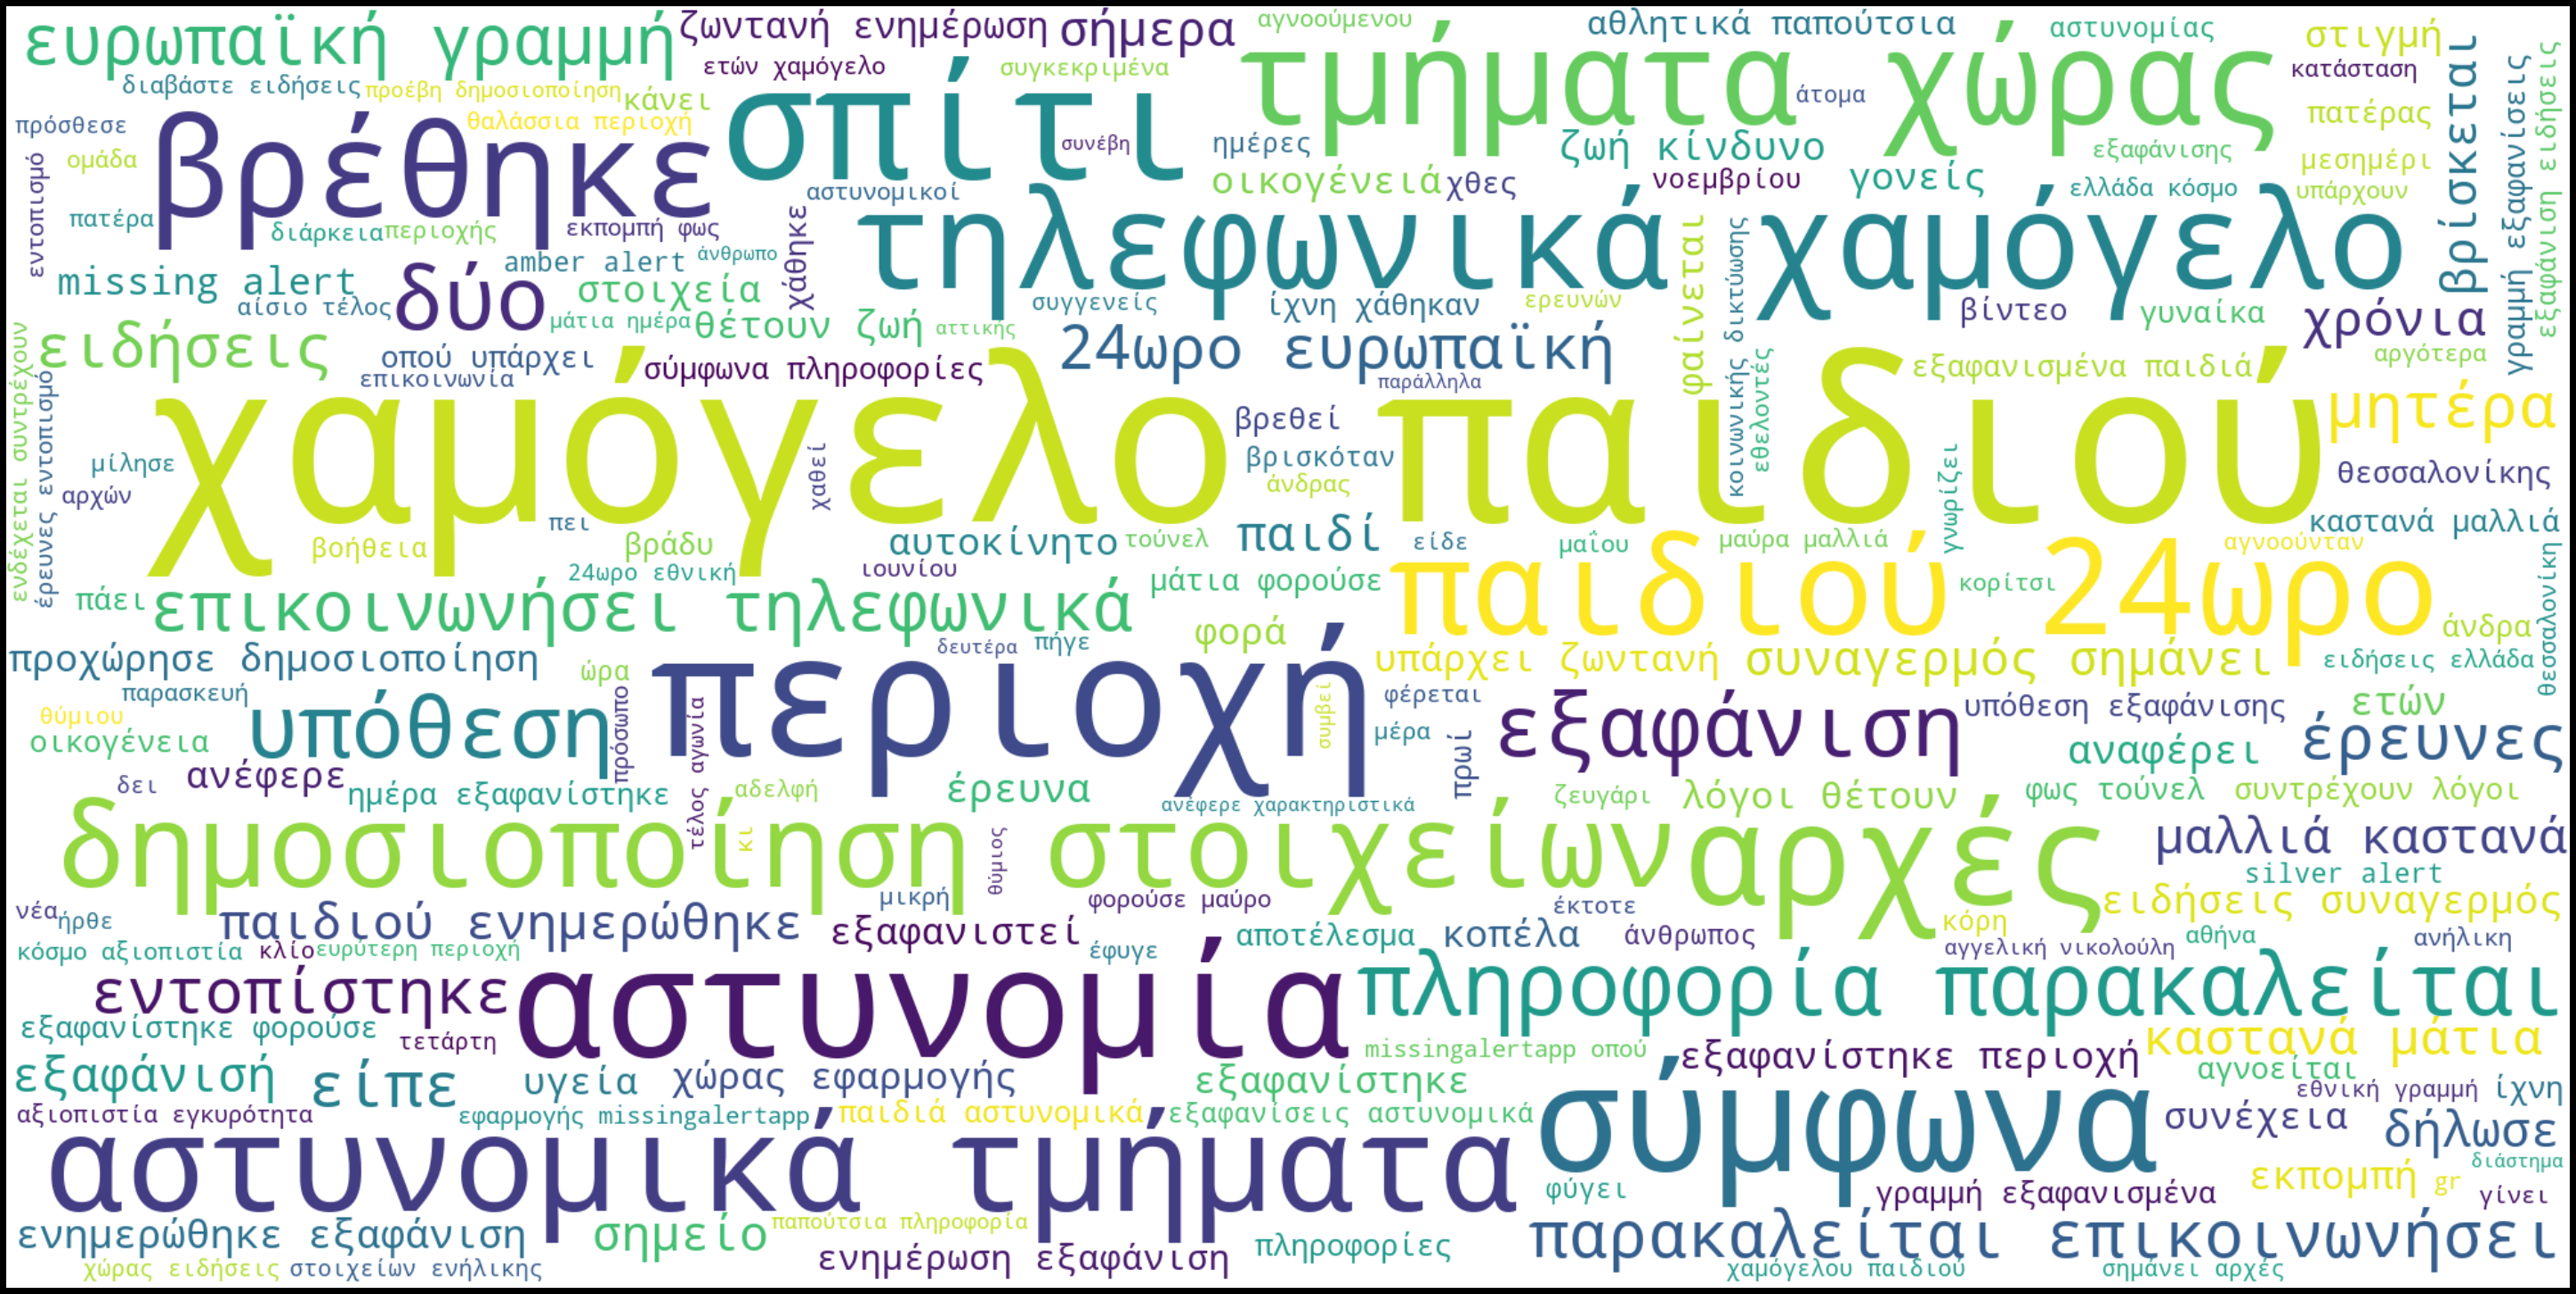

In [80]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'white'
 ).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

**CountVectorizer**

In [81]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [82]:
count_vector = cv.fit_transform(dfinal['Text'])

In [83]:
# cv.get_feature_names()
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,00μμ,01,02,03,04,05,06,07,...,ύποπτος,ύστατη,ύστερα,ύψος,ώθησαν,ώθησε,ώμο,ώρα,ώρες,ώστε
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,3,0,...,0,0,0,1,0,0,0,0,1,0


In [84]:
cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95)

In [85]:
count_vector = cv.fit_transform(dfinal['Text'])

In [86]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,01,02,03,04,05,06,07,08,...,όνομα,όντως,όρος,όρους,όχημα,ύποπτο,ύποπτος,ύψος,ώρα,ώρες
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,1,0,1


In [87]:
from html import unescape
def my_tokenizer(doc):
            
    # apply the preprocessing and tokenzation steps
    doc_clean = unescape(doc).lower()
    tokens = nlp(doc_clean)
    lemmatized_tokens = [token.lemma_ for token in tokens if (len(str(token.lemma_))>2)]
            
    # use CountVectorizer's _word_ngrams built in method
    # to remove stop words and extract n-grams
    return(lemmatized_tokens)

In [89]:
cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(dfinal['Text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['έκασε ο', 'έτερα', 'έτερων', 'ήσω', 'ίσιος', 'αλλιώ', 'αλλιώτικος', 'αλλοιώ', 'αρκετός', 'γίνομαι', 'γρήγορο', 'διο', 'είχος', 'εαυτής', 'εαυτός', 'εκάστος', 'επόμενος', 'εσένος', 'ετέραις', 'ετού', 'ετούε ο', 'εχτής', 'ιδίο', 'κάνενς', 'κάνω', 'κανενό', 'λοιπός', 'μέλλω', 'μερικός', 'μπορώ', 'μόνας', 'ολωσδιόλος', 'ορισμένος', 'οριόμενσς', 'ποία', 'πολύς', 'προτός', 'προχτής', 'σε ο', 'ταύ', 'τουλάχισε ο', 'τρίτος', 'τός', 'χωριστό'] not in stop_words.
  % sorted(inconsistent)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,"1,60","1,70","1,75μ",1.55,1.60,1.62,1.65,1.70,1.75,1.80,...,ψυχικός,ψυχολογικός,όνομα,όντως,όριο,όρος,όχημα,ύποπτος,ύψος,ώρα
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [90]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20) #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(dfinal['Text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,alert,έρευνες,αρχές,αστυνομία,βρέθηκε,δύο,ειδήσεις,εντοπισμό,εξαφάνιση,εξαφανίστηκε,ετών,ζωή,μάτια,παιδιού,περιοχή,σπίτι,σύμφωνα,υπόθεση,χαμόγελο,ύψος
0,0,0,0,0,0,0,1,0,2,1,1,1,1,2,1,0,0,0,2,1
1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0
2,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0
3,0,0,1,0,0,0,1,0,2,2,1,1,1,2,2,0,0,0,2,1
4,0,0,0,0,0,0,1,1,1,2,1,1,1,2,1,0,0,0,2,1


In [91]:
sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False).head(10)

παιδιού         352
περιοχή         310
ειδήσεις        297
χαμόγελο        294
εξαφάνιση       286
εξαφανίστηκε    198
σύμφωνα         194
αρχές           185
έρευνες         167
σπίτι           161
dtype: int64

Text(0.8, 0.05, 'Source of Articles: News247.gr')

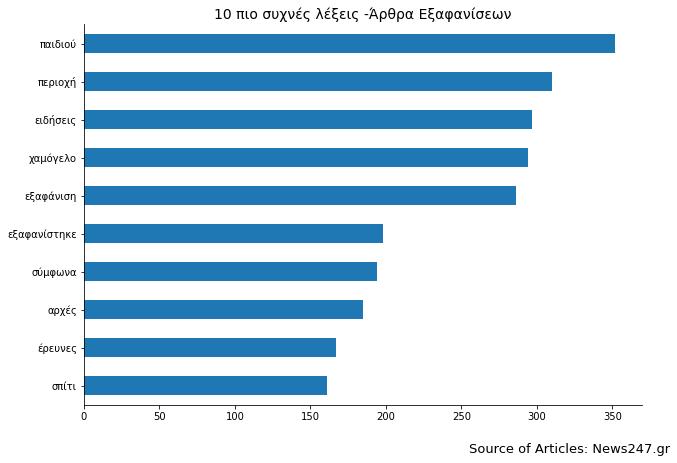

In [138]:
plt.figure(figsize=(10,7))
w = sum_words.sort_values(ascending = True).tail(10).plot(kind='barh')
w.spines['right'].set_visible(False)
w.spines['top'].set_visible(False)
w.set_title('10 πιο συχνές λέξεις -Άρθρα Εξαφανίσεων',fontsize=14)
plt.suptitle('Source of Articles: News247.gr',fontsize=13, x=0.8 ,y=0.05)

In [93]:
#για δυάδες λέξεων
cv2 = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, ngram_range=(2, 2) ) #token_pattern = '\\bκυ[α-ωά-ώ]*\\b') #, tokenizer=my_tokenizer)
count_vector2 = cv2.fit_transform(dfinal['Text'])
results2 = pd.DataFrame(count_vector2.toarray(), columns=cv2.get_feature_names()) 
results2.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,116000 αστυνομικά,24ωρο ευρωπαϊκή,αστυνομικά τμήματα,δημοσιοποίηση στοιχείων,ενημερώθηκε εξαφάνιση,επικοινωνήσει τηλεφωνικά,ευρωπαϊκή γραμμή,ζωή κίνδυνο,θέτουν ζωή,καστανά μάτια,λόγοι θέτουν,μαλλιά καστανά,παιδιού 24ωρο,παιδιού ενημερώθηκε,παρακαλείται επικοινωνήσει,πληροφορία παρακαλείται,συναγερμός σημάνει,τηλεφωνικά χαμόγελο,τμήματα χώρας,χαμόγελο παιδιού
0,1,1,1,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,2
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,1,0,1,0,1,1,1,1,1,1,0,1,1,1,1,1,2
4,1,1,1,1,1,0,1,0,0,1,0,1,1,1,0,1,1,1,1,2


In [94]:
#να δουμε τις 10 πιο συχνες δυαδες λεξεων
sum_words2 =  results2.sum(axis =0)
sum_words2.sort_values(ascending = False).head(10)

χαμόγελο παιδιού              292
τηλεφωνικά χαμόγελο            89
αστυνομικά τμήματα             89
παιδιού 24ωρο                  89
τμήματα χώρας                  88
δημοσιοποίηση στοιχείων        85
πληροφορία παρακαλείται        85
επικοινωνήσει τηλεφωνικά       82
ευρωπαϊκή γραμμή               82
παρακαλείται επικοινωνήσει     81
dtype: int64

Text(0.8, 0.05, 'Source of Articles: News247.gr')

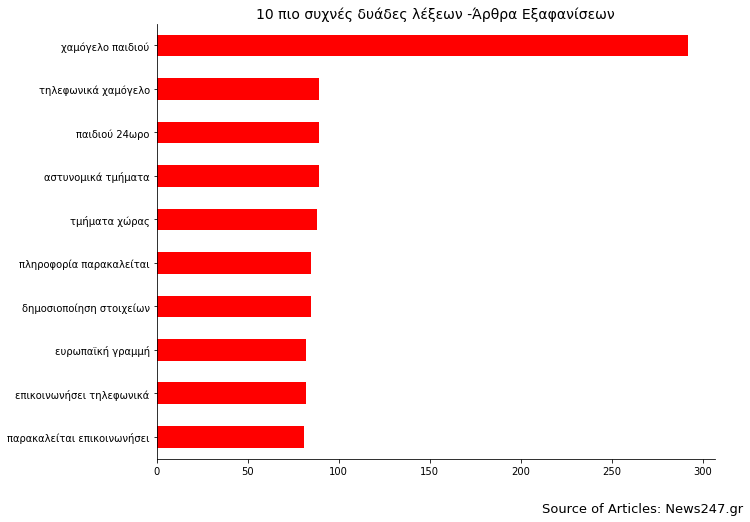

In [137]:
plt.figure(figsize=(10,8))
w2 = sum_words2.sort_values(ascending = True).tail(10).plot(kind='barh', color='red')
w2.spines['right'].set_visible(False)
w2.spines['top'].set_visible(False)
w2.set_title('10 πιο συχνές δυάδες λέξεων -Άρθρα Εξαφανίσεων',fontsize=14)
plt.suptitle('Source of Articles: News247.gr',fontsize=13, x=0.8 ,y=0.05)

**Sentiment Analysis**

In [109]:
import glob
from sklearn.feature_extraction.text import CountVectorizer

In [110]:
filepath = "https://raw.githubusercontent.com/datajour-gr/Data_journalism/master/week10/NRC_GREEK_Translated_6_2020.csv"
emolex_df = pd.read_csv(filepath)
emolex_df.head()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,αφεση,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ενορκη βεβαιωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,εχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,εχω,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,οριο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [111]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True)

In [112]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word, 
                      strip_accents = 'unicode',  
                      stop_words= nlp.Defaults.stop_words,
                      ngram_range=(1, 2))

In [114]:
matrix = vec.fit_transform(dfinal['Text'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:1323: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  "Upper case characters found in"
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια

,αφεση,ενορκη βεβαιωση,εχοντας,εχω,οριο,ορμος,υδρα,αγια τραπεζα,αμην,απατσι,...,κλητηριο ενταλμα,κατειργασμενος,μαγια,κιτρινο,κιτρινιζω,ουρλιασμα,κροκος αυγου,νεοτερος,ζεφυρος,ζουμ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [115]:
# Φτιάξε λίστεσ με τα words ανα συναισθημα
angry_words = emolex_df[emolex_df.Anger == 1]['word']
positive_words = emolex_df[emolex_df.Positive == 1]['word']
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']
negative_words = emolex_df[emolex_df.Negative == 1]['word']
joy_words = emolex_df[emolex_df.Joy == 1]['word']
trust_words = emolex_df[emolex_df.Trust == 1]['word']
fear_words = emolex_df[emolex_df.Fear == 1]['word']

In [117]:
dfinal['anger'] = wordcount_df[angry_words].sum(axis=1)
dfinal['positivity'] = wordcount_df[positive_words].sum(axis=1)
dfinal['joy'] = wordcount_df[joy_words].sum(axis=1)
dfinal['disgust'] = wordcount_df[disgust_words].sum(axis=1)
dfinal['surprise'] = wordcount_df[surprise_words].sum(axis=1)
dfinal['trust'] = wordcount_df[trust_words].sum(axis=1)
dfinal['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)
dfinal['sadness'] = wordcount_df[sadness_words].sum(axis=1)
dfinal['negative'] = wordcount_df[negative_words].sum(axis=1)
dfinal['fear'] = wordcount_df[fear_words].sum(axis=1)

In [119]:
dfinal.head(2)

,Title,Datetime,Tag,Summary,Url,Text,Year,Month,anger,positivity,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
0,Συναγερμός για την εξαφάνιση 13χρονης στη Χαλκ...,2022-06-28 22:17:00,εξαφάνιση,"Η Χαλιμά Α. έχει ύψος 1,60 μ., έχει κανονικό β...",https://www.news247.gr/koinonia/synagermos-gia...,"στις 27/06/2022, στις 20:30 μμ, εξαφανίστηκε α...",2022,6,0,5,5,4,7,4,2,6,4,2
1,Ιωάννινα: Αγνοείται 16χρονος στη λίμνη Πηγών Αώου,2022-06-26 18:40:00,εξαφάνιση,Σε εξέλιξη επιχείρηση για τον εντοπισμό ανηλίκ...,https://www.news247.gr/koinonia/ioannina-agnoe...,συναγερμός σήμανε το απόγευμα της κυριακής (26...,2022,6,0,2,1,1,1,0,2,2,2,0


In [122]:
#Ποιος είναι ο βαθμός θετικότητας
dfinal['positivity'].sum()

2895

In [123]:
dfinal['negative'].sum()

2360

Text(0.8, 0.05, 'Source of Articles: News247.gr')

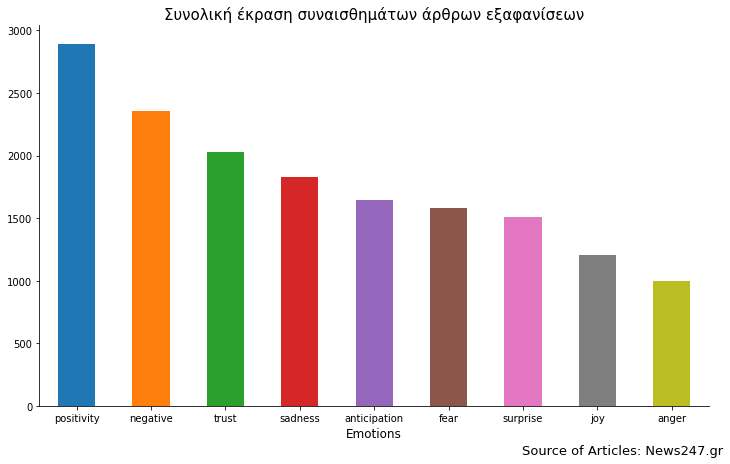

In [141]:
t = dfinal[['anger','positivity','joy','surprise','trust','anticipation','sadness','negative','fear']].sum().sort_values(ascending= False).plot(kind='bar',color=('C0','C1','C2','C3','C4','C5','C6','C7','C8'), figsize=(12,7))
t.set_title('Συνολική έκραση συναισθημάτων άρθρων εξαφανίσεων', fontsize=15)
t.spines['right'].set_visible(False)
t.spines['top'].set_visible(False)
t.set_xlabel('Emotions', fontsize=12)
t.tick_params(axis='x', labelrotation=0)
plt.suptitle('Source of Articles: News247.gr',fontsize=13, x=0.8 ,y=0.05)

Text(0.8, 0.05, 'Source of Articles: News247.gr')

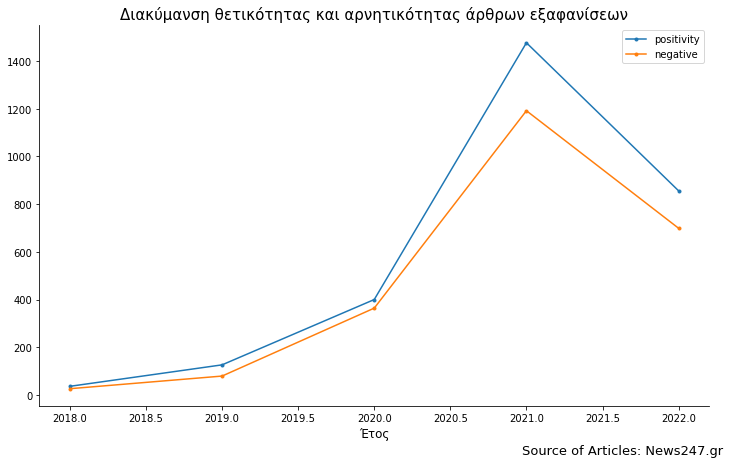

In [143]:
p_n = dfinal.groupby('Year')[['positivity','negative']].sum().plot(figsize=(12,7), marker='.')
p_n.set_title("Διακύμανση θετικότητας και αρνητικότητας άρθρων εξαφανίσεων", fontsize=15)
p_n.spines['top'].set_visible(False)
p_n.spines['right'].set_visible(False)
p_n.set_xlabel("Έτος", fontsize=12)
plt.suptitle('Source of Articles: News247.gr',fontsize=13, x=0.8 ,y=0.05)

Text(0.8, 0.05, 'Source of Articles: News247.gr')

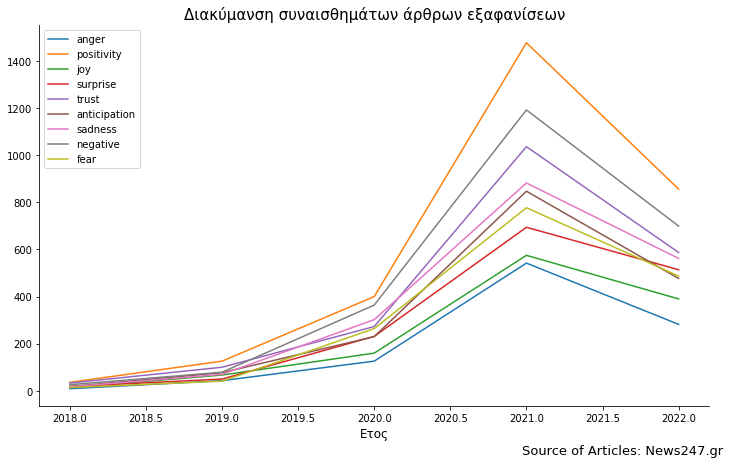

In [144]:
e_m = dfinal.groupby('Year')[['anger','positivity','joy','surprise','trust','anticipation','sadness','negative','fear']].sum().plot(figsize=(12,7))
e_m.set_title("Διακύμανση συναισθημάτων άρθρων εξαφανίσεων", fontsize=15)
e_m.spines['top'].set_visible(False)
e_m.spines['right'].set_visible(False)
e_m.set_xlabel("Ετος", fontsize=12)
plt.suptitle('Source of Articles: News247.gr',fontsize=13, x=0.8 ,y=0.05)

Ωραια θα κάνω και τα παραπάνω γραφήμα αντι με groupby με resample όπως ζητείται στην εργασία

In [145]:
dfinal.set_index('Datetime' , inplace=True)

In [159]:
dfinal.head(2)

,Title,Tag,Summary,Url,Text,Year,Month,anger,positivity,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
Datetime,,,,,,,,,,,,,,,,,
2022-06-28 22:17:00,Συναγερμός για την εξαφάνιση 13χρονης στη Χαλκ...,εξαφάνιση,"Η Χαλιμά Α. έχει ύψος 1,60 μ., έχει κανονικό β...",https://www.news247.gr/koinonia/synagermos-gia...,"στις 27/06/2022, στις 20:30 μμ, εξαφανίστηκε α...",2022,6,0,5,5,4,7,4,2,6,4,2
2022-06-26 18:40:00,Ιωάννινα: Αγνοείται 16χρονος στη λίμνη Πηγών Αώου,εξαφάνιση,Σε εξέλιξη επιχείρηση για τον εντοπισμό ανηλίκ...,https://www.news247.gr/koinonia/ioannina-agnoe...,συναγερμός σήμανε το απόγευμα της κυριακής (26...,2022,6,0,2,1,1,1,0,2,2,2,0


Text(0.8, 0.05, 'Source of Articles: News247.gr')

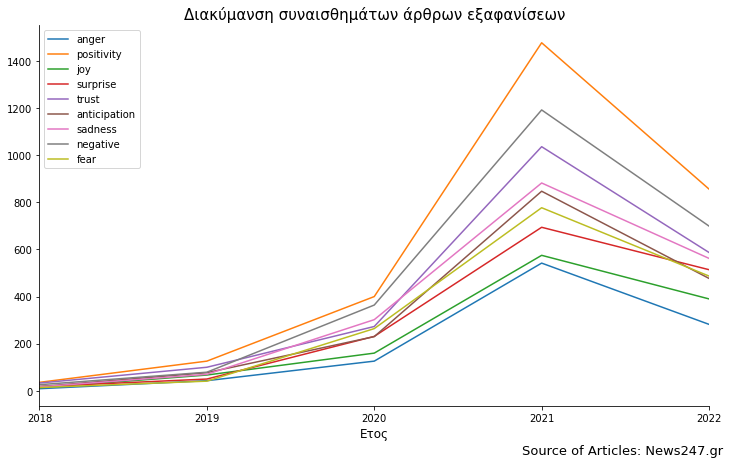

In [158]:
rd= dfinal.resample('A')[['anger','positivity','joy','surprise','trust','anticipation','sadness','negative','fear']].sum().plot(figsize=(12,7))
rd.set_title("Διακύμανση συναισθημάτων άρθρων εξαφανίσεων", fontsize=15)
rd.spines['top'].set_visible(False)
rd.spines['right'].set_visible(False)
rd.set_xlabel("Ετος", fontsize=12)
plt.suptitle('Source of Articles: News247.gr',fontsize=13, x=0.8 ,y=0.05)